# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_path = 'data/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

In [37]:
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0

img_hls_down = img_hls.astype('float32')
img_hls_down[..., -1] = img_hls_down[..., -1] / 255 - change_percentage
img_hls_down[:,:,-1].shape

(512, 512)

In [32]:
img_hls_down[img_hls_down[..., -1] < 0] = 0
img_hls_down[..., -1] = img_hls_down[..., -1]*255
img_hls_down = img_hls_down.astype('uint8')

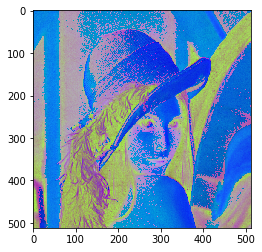

In [33]:
plt.imshow(img_hls_down)

In [9]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_up = img_hsv.astype('float32')

img_hsv_down[...,-1] = (img_hsv_down[...,-1] / 255) - change_percentage

# 在 HSV color space 增加飽和度
img_hsv_up[...,-1] = (img_hsv_up[...,-1] / 255) + change_percentage


img_hsv_down[img_hsv_down[..., -1] < 0] = 0
img_hsv_up[img_hsv_up[..., -1] > 1] = 1

img_hsv_down[..., -1] = img_hsv_down[..., -1]*255
img_hsv_up[..., -1] = img_hsv_up[..., -1]*255

img_hsv_down  = img_hsv_down.astype('uint8')
img_hsv_up  = img_hsv_up.astype('uint8')

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))

In [40]:
img_hsv_change.shape

(512, 1536, 3)

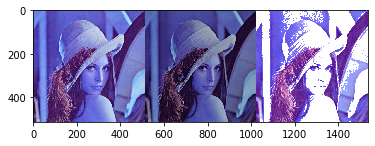

In [10]:
plt.imshow(img_hsv_change)

In [ ]:
while True:
    cv2.imshow('change saturation', img_hsv_change)
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

In [14]:
img_g = img[...,0]
img_b = img[...,1]
img_r = img[...,2]

equalHist_by_g = cv2.equalizeHist(img_g)
equalHist_by_b = cv2.equalizeHist(img_b)
equalHist_by_r = cv2.equalizeHist(img_r)

In [22]:
img_gray_equalHist = cv2.merge((equalHist_by_g, equalHist_by_b,equalHist_by_r))

In [24]:
# case 1
# 每個 channel 個別做直方圖均衡
img_g = img[...,0]
img_b = img[...,1]
img_r = img[...,2]

equalHist_by_g = cv2.equalizeHist(img_g)
equalHist_by_b = cv2.equalizeHist(img_b)
equalHist_by_r = cv2.equalizeHist(img_r)

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = cv2.merge((equalHist_by_g, equalHist_by_b,equalHist_by_r))
# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
#img_hsv_equal = 

# 組合圖片 + 顯示圖片
#img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))

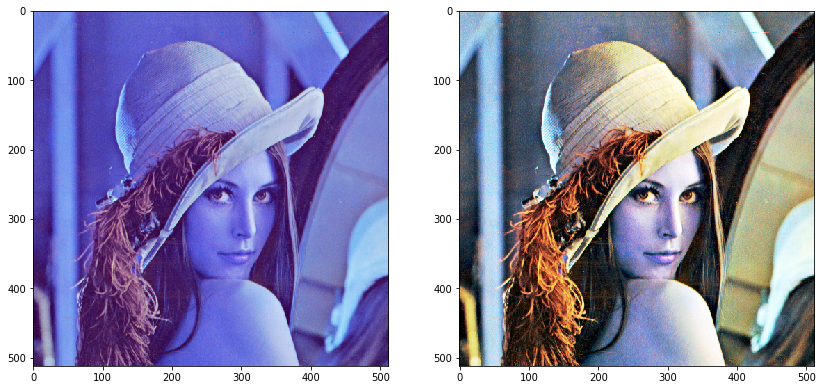

In [25]:
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_bgr_equal)

In [38]:
# case 1
# 每個 channel 個別做直方圖均衡
img_h = img_hls[...,0]
img_s = img_hls[...,1]
img_v = img_hls[...,2]

img_s = cv2.equalizeHist(img_hls[...,1])

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = cv2.merge((img_h, img_s,img_v))

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
#img_hsv_equal = 

# 組合圖片 + 顯示圖片
#img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))

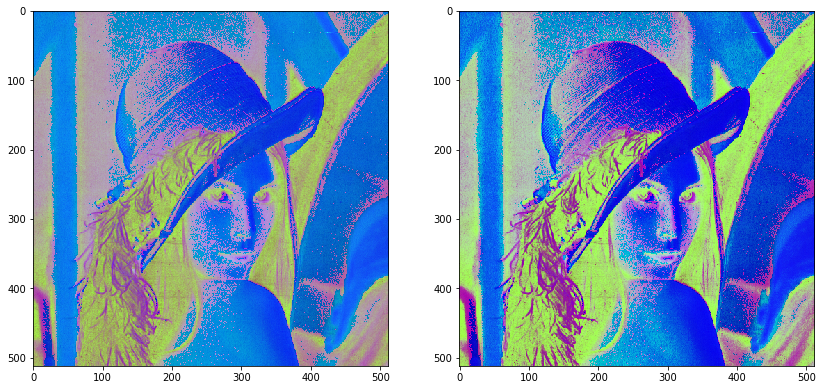

In [39]:
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img_hls)
plt.subplot(122)
plt.imshow(img_bgr_equal)

## 調整對比 / 明亮

In [ ]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.5, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=75)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('adjust contrast and brighness', img_contrast_light)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break